In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
nypd = pd.read_csv("../data/sort_by_pct_total.csv")

In [3]:
nypd.head()

,PCT,crime_category,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,3.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
1,1,seven_major_felony_offenses,RAPE,12.0,5.0,10.0,11.0,11.0,5.0,4.0,7.0,12.0,4.0,6.0,13.0,10.0,12.0,8.0,7.0
2,1,seven_major_felony_offenses,ROBBERY,252.0,188.0,210.0,164.0,154.0,172.0,119.0,128.0,108.0,106.0,96.0,102.0,81.0,68.0,50.0,79.0
3,1,seven_major_felony_offenses,FELONY ASSAULT,139.0,164.0,147.0,134.0,129.0,121.0,94.0,90.0,83.0,83.0,68.0,94.0,110.0,87.0,76.0,86.0
4,1,seven_major_felony_offenses,BURGLARY,475.0,437.0,297.0,403.0,246.0,293.0,255.0,231.0,189.0,207.0,170.0,155.0,188.0,171.0,145.0,138.0


In [4]:
list(nypd.columns.values)

['PCT',
 'crime_category',
 'CRIME',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [5]:
nypd.PCT.unique()

array([  1,   5,   6,   7,   9,  10,  13,  14,  17,  18,  19,  20,  22,
        23,  24,  25,  26,  28,  30,  32,  33,  34,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  52,  60,  61,  62,  63,  66,
        67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,  81,
        83,  84,  88,  90,  94, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 120, 121, 122, 123])

In [6]:
nypd.describe()

,PCT,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000
mean,63.324675,520.161781,476.355473,448.851948,425.793692,420.445269,413.341744,415.053061,423.438219,421.016698,413.547310,412.908349,405.949536,402.785900,392.085343,378.916512,358.834879
std,35.889746,1167.650478,1065.339416,1002.341326,964.190119,941.857693,930.221629,946.159077,990.111387,993.075829,1011.082109,1020.784096,999.404178,967.354758,918.861255,890.776685,825.916422
min,1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,30.000000,30.000000,28.000000,26.500000,26.500000,26.000000,26.000000,25.000000,25.000000,24.000000,24.000000,24.000000,25.000000,26.000000,25.000000,24.000000
50%,66.000000,116.000000,114.000000,100.000000,99.000000,105.000000,104.000000,107.000000,110.000000,109.000000,106.000000,101.000000,103.000000,101.000000,102.000000,100.000000,99.000000
75%,100.000000,512.500000,458.500000,436.000000,411.000000,400.000000,399.000000,399.500000,385.500000,376.500000,371.500000,374.000000,369.500000,365.500000,363.000000,337.500000,330.000000
max,123.000000,15241.000000,13491.000000,11562.000000,11531.000000,11396.000000,11362.000000,11072.000000,12127.000000,11844.000000,13754.000000,13927.000000,14025.000000,13598.000000,12510.000000,12060.000000,10779.000000


### Crime reshape data

In [7]:
data = pd.melt(nypd,id_vars=['crime_category', 'CRIME'], value_vars=['2000','2001','2002','2003','2004','2005',
                                                                     '2006','2007','2008',
                                                                     '2009','2010','2011',
                                                                    '2012','2013','2014',])
#data = pd.melt(nypd,id_vars=['crime_category'], value_vars=['2000'])

In [8]:
data.head()

,crime_category,CRIME,variable,value
0,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,2000,3.0
1,seven_major_felony_offenses,RAPE,2000,12.0
2,seven_major_felony_offenses,ROBBERY,2000,252.0
3,seven_major_felony_offenses,FELONY ASSAULT,2000,139.0
4,seven_major_felony_offenses,BURGLARY,2000,475.0


In [9]:
data.tail()

,crime_category,CRIME,variable,value
40420,misdemeanor_offenses_listing,ADMINISTRATIVE CODE (6),2014,1.0
40421,misdemeanor_offenses_listing,FRAUDS (3),2014,64.0
40422,misdemeanor_offenses_listing,AGGRAVATED HARASSMENT 2,2014,182.0
40423,misdemeanor_offenses_listing,OTHER MISDEMEANORS (8),2014,20.0
40424,misdemeanor_offenses_listing,TOTAL MISDEMEANOR OFFENSES,2014,1888.0


### Crime by category overtime 2000 to 2015

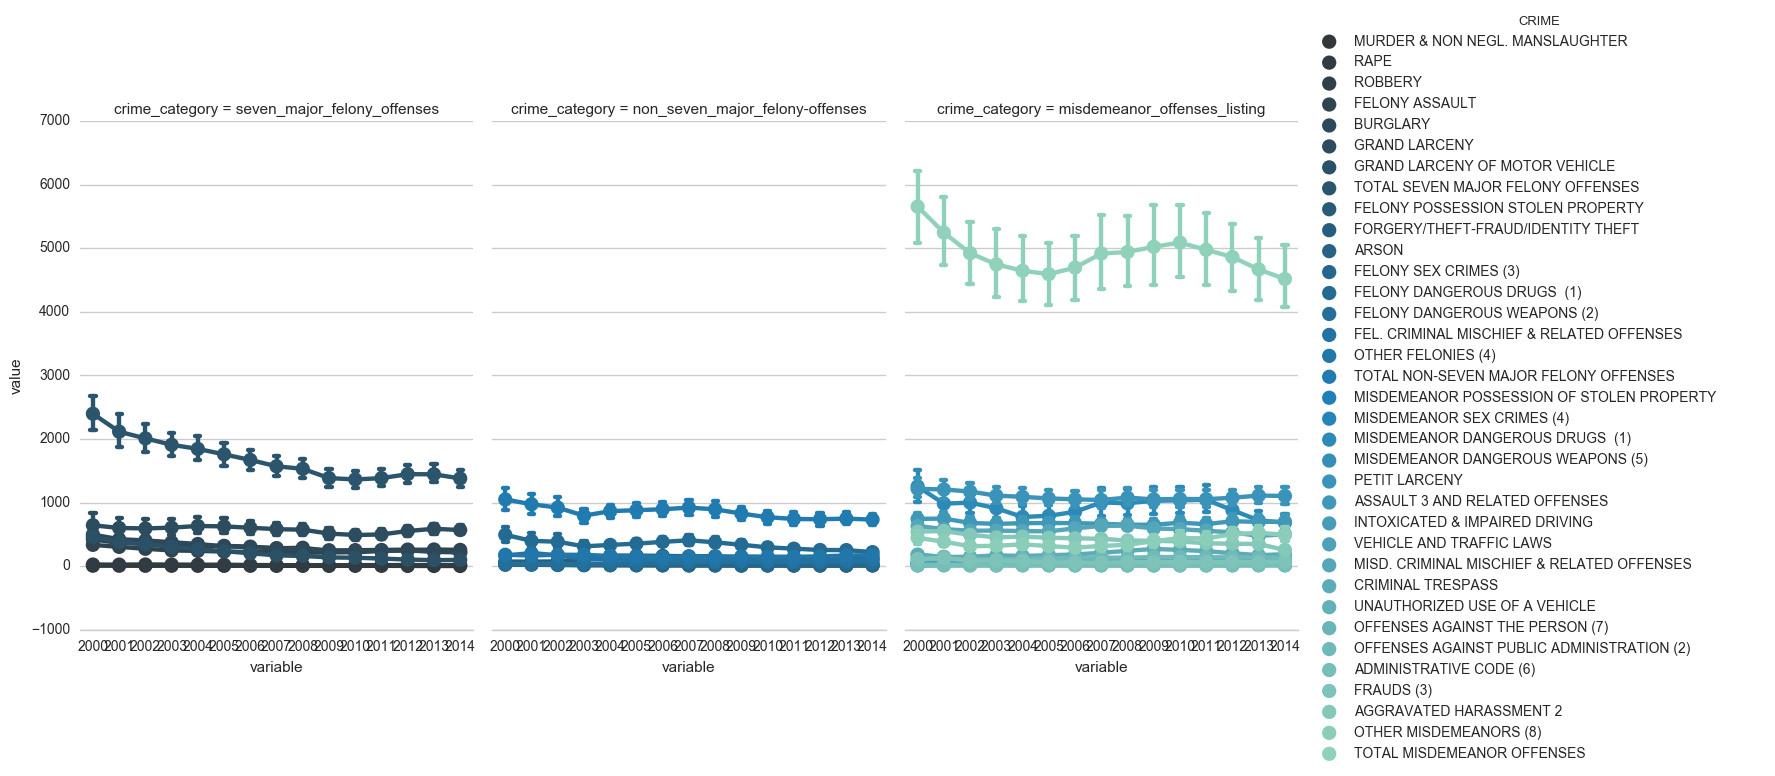

In [11]:
g = sns.factorplot(x="variable", y="value", hue="CRIME", col="crime_category", data=data,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)


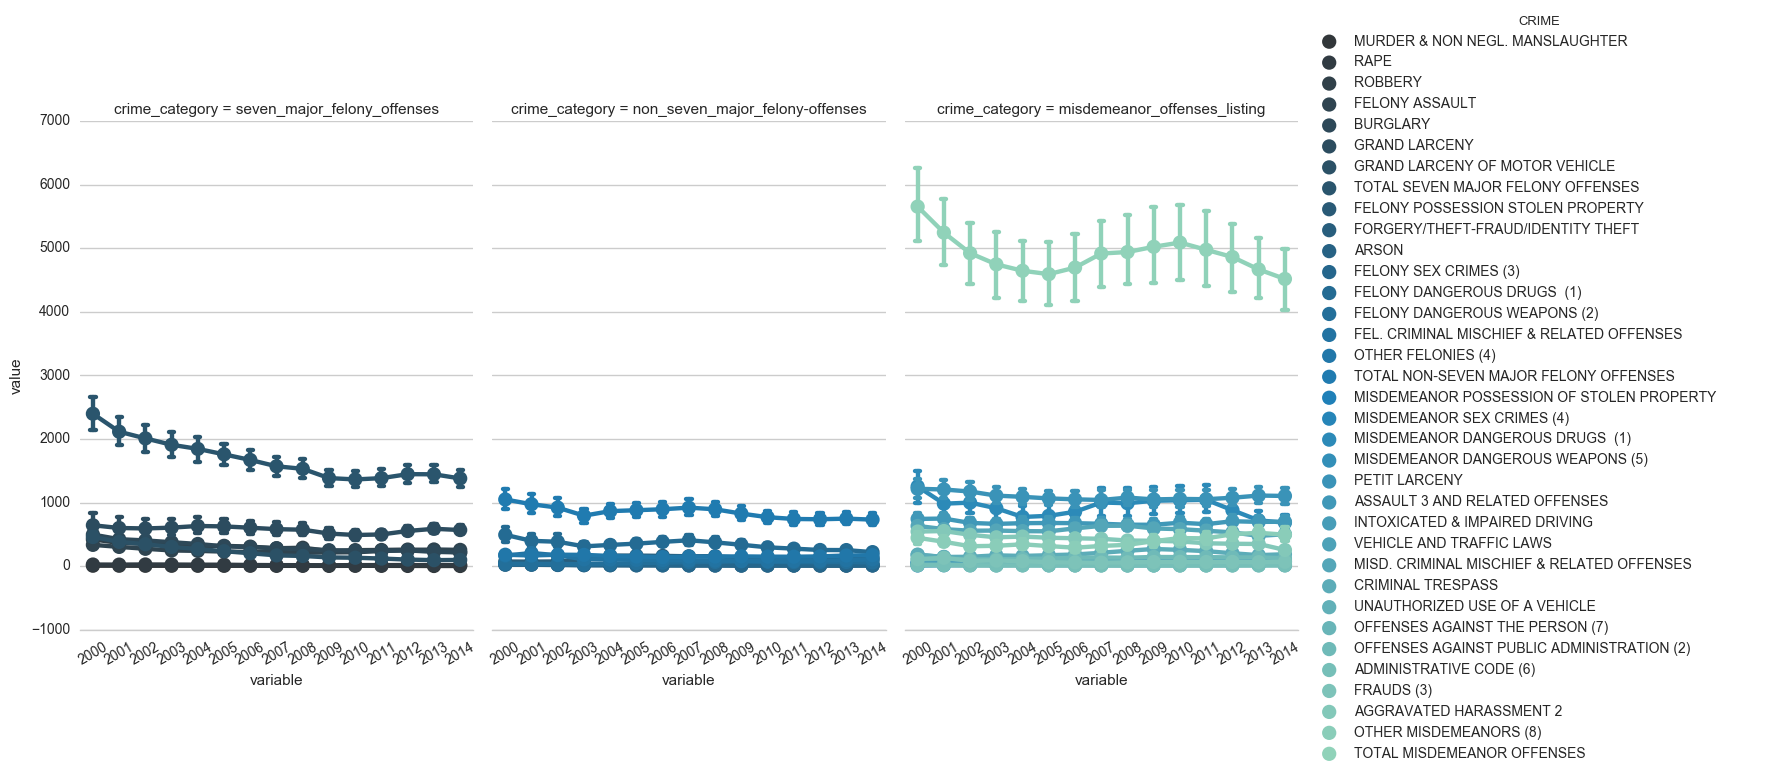

In [12]:
g = sns.factorplot(x="variable", y="value", hue="CRIME", col="crime_category", data=data,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)
g.set_xticklabels(rotation=30)

### Reshape data to include PCT #

In [59]:
datap = pd.melt(nypd,id_vars=['crime_category', 'CRIME', 'PCT'], value_vars=['2000','2001','2002','2003','2004','2005',
                                                                     '2006','2007','2008',
                                                                     '2009','2010','2011',
                                                                    '2012','2013','2014','2015'])

In [60]:
datap.head()

,crime_category,CRIME,PCT,variable,value
0,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,1,2000,3.0
1,seven_major_felony_offenses,RAPE,1,2000,12.0
2,seven_major_felony_offenses,ROBBERY,1,2000,252.0
3,seven_major_felony_offenses,FELONY ASSAULT,1,2000,139.0
4,seven_major_felony_offenses,BURGLARY,1,2000,475.0


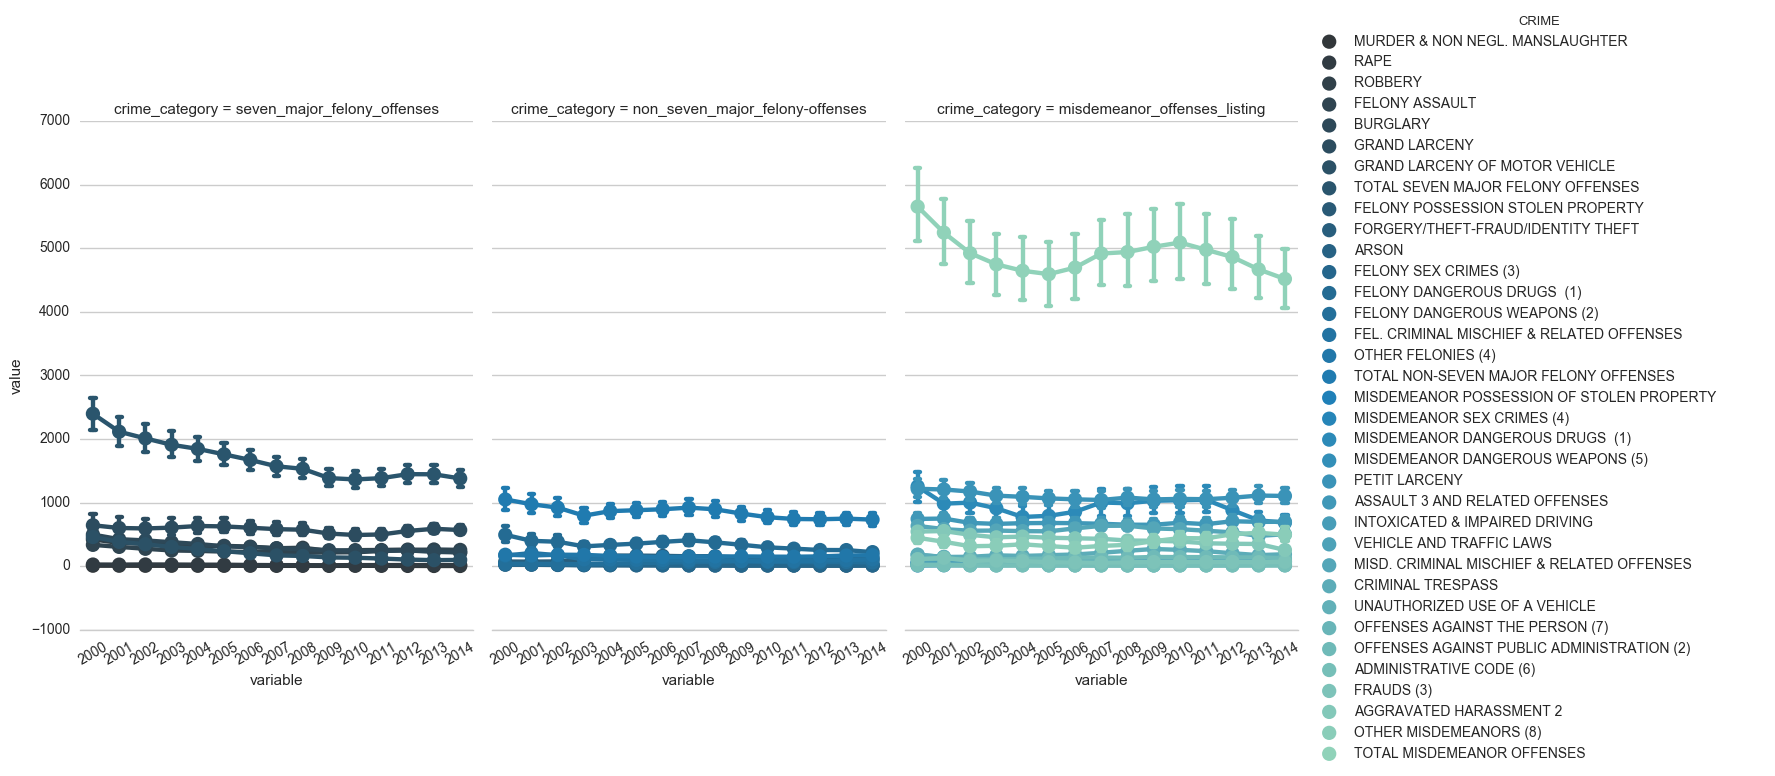

In [61]:
g = sns.factorplot(x="variable", y="value", hue="CRIME", col="crime_category", data=data,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)
g.set_xticklabels(rotation=30)

### Focus on 2014

In [62]:
C2014 = datap.loc[datap[datap['variable'] == "2014"].index]

In [79]:
C2014.head()

,crime_category,CRIME,PCT,variable,value
37730,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,1,2014,0.0
37731,seven_major_felony_offenses,RAPE,1,2014,8.0
37732,seven_major_felony_offenses,ROBBERY,1,2014,50.0
37733,seven_major_felony_offenses,FELONY ASSAULT,1,2014,76.0
37734,seven_major_felony_offenses,BURGLARY,1,2014,145.0


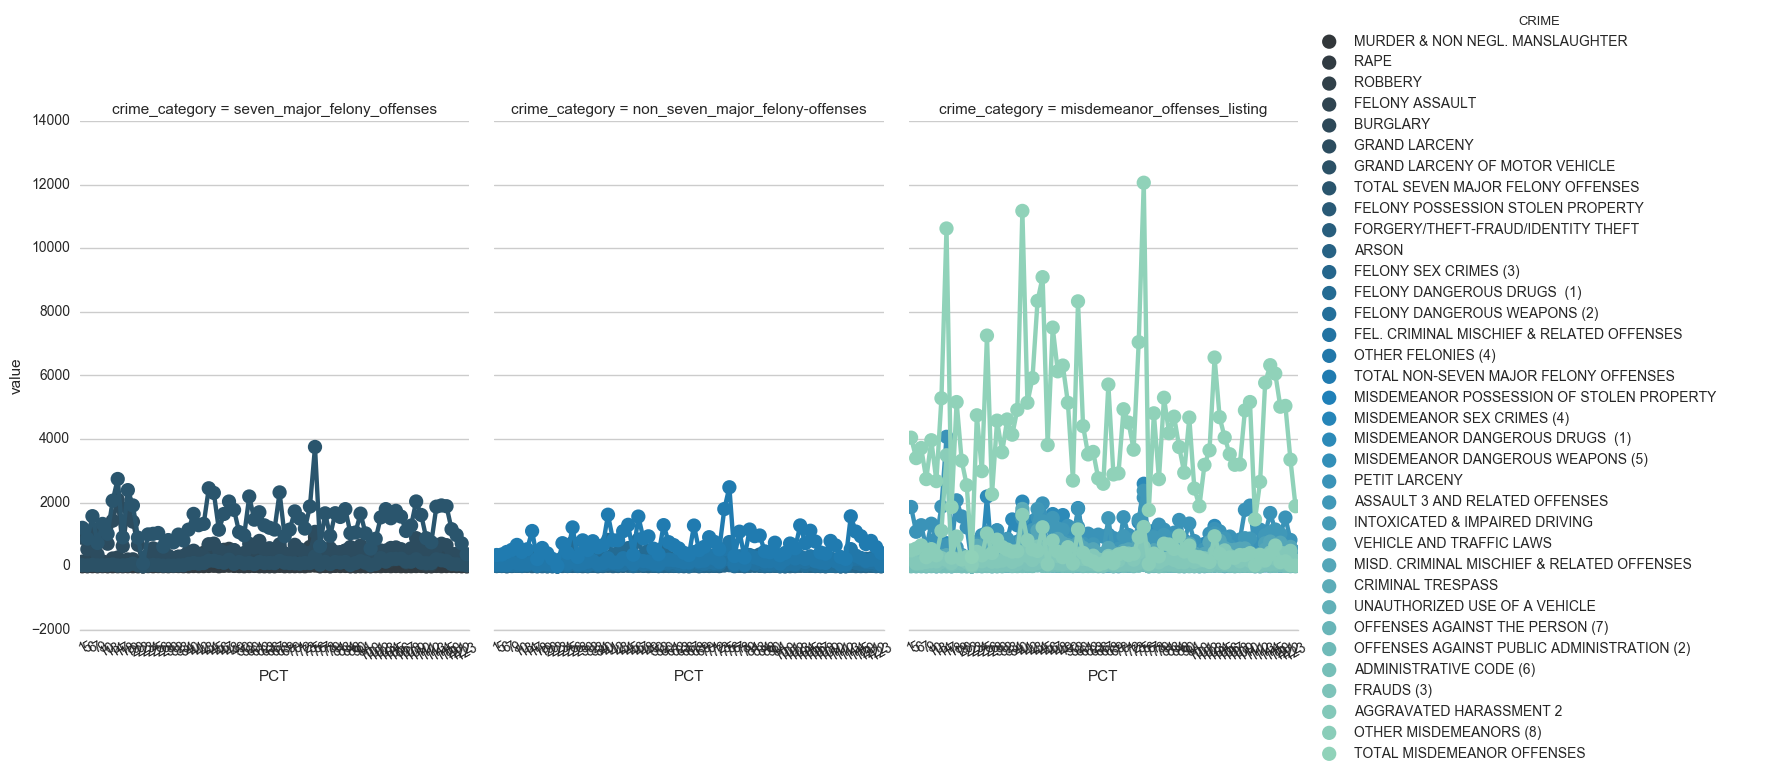

In [65]:
g = sns.factorplot(x="PCT", y="value", hue="CRIME", col="crime_category", data=C2014,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)
g.set_xticklabels(rotation=30)

### Make inidividual plots for each major crime categories

In [80]:
C2014g1 = datap.loc[C2014[C2014['crime_category'] == "seven_major_felony_offenses"].index]

### subdivide datasets

In [68]:
C2014g2 = datap.loc[C2014[C2014['crime_category'] == "non_seven_major_felony-offenses"].index]

In [69]:
C2014g3 = datap.loc[C2014[C2014['crime_category'] == "misdemeanor_offenses_listing"].index]

In [66]:
C2014.crime_category.unique()

array(['seven_major_felony_offenses', 'non_seven_major_felony-offenses',
       'misdemeanor_offenses_listing'], dtype=object)

### 2014 Group 1 Crimes

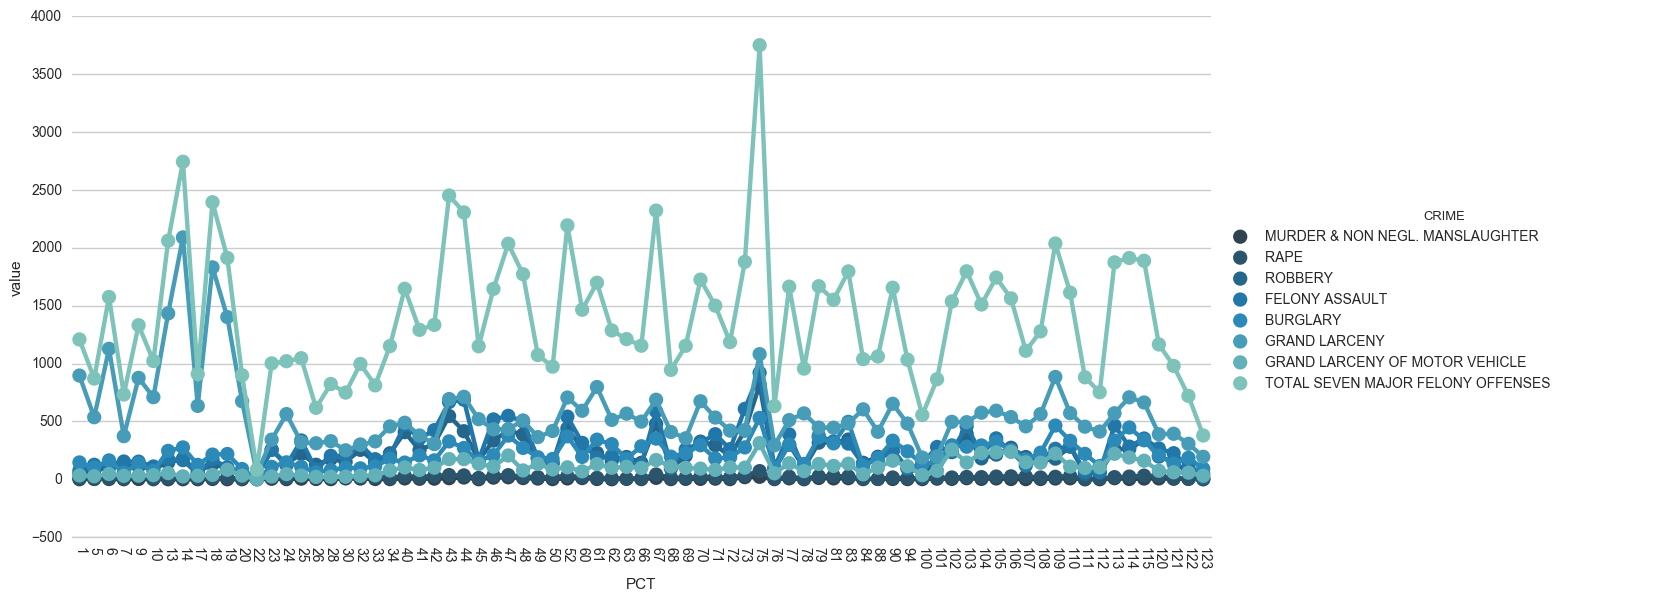

In [91]:
g = sns.factorplot(x="PCT", y="value", hue="CRIME", data=C2014g1,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=2.1)
g.despine(left=True)
g.set_xticklabels(rotation=270)
#plt.figure(figsize=(8, 6))
#g.set_size_inches(11.7, 8.27)

#### 2014 Group 2 Crimes

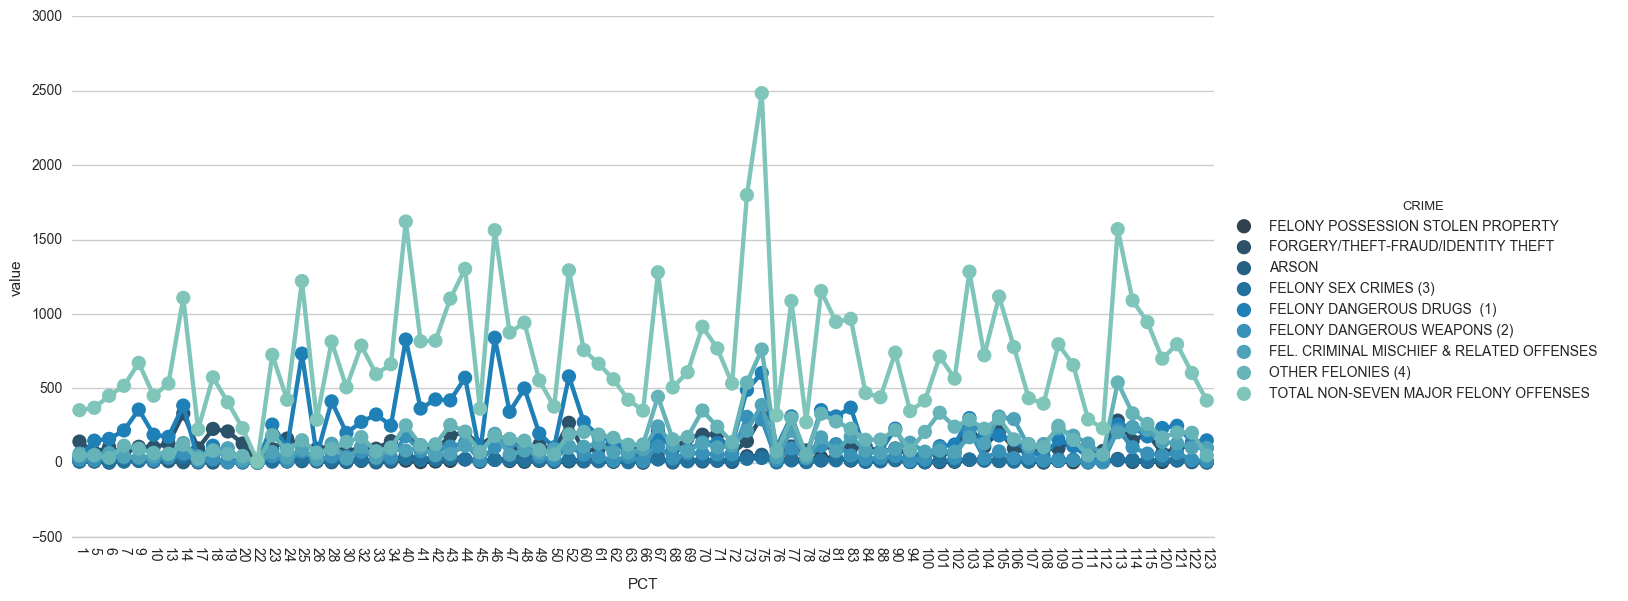

In [92]:
g = sns.factorplot(x="PCT", y="value", hue="CRIME", data=C2014g2,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=2.1)
g.despine(left=True)
g.set_xticklabels(rotation=270)

#### 2014  Group 3 Crimes 

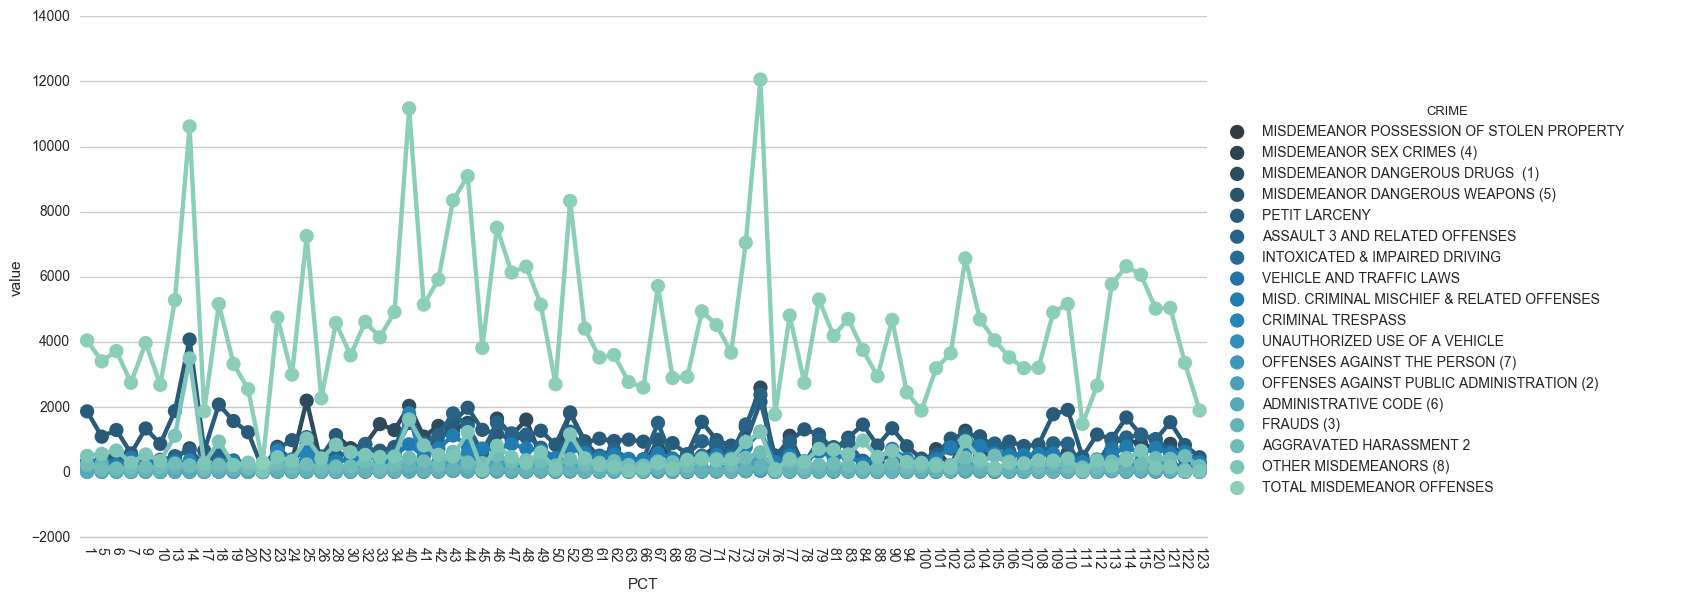

In [93]:
g = sns.factorplot(x="PCT", y="value", hue="CRIME", data=C2014g3,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=2.1)
g.despine(left=True)
g.set_xticklabels(rotation=270)

### Subdivide 2014 by PCT

In [ ]:
######http://www.nyc.gov/html/nypd/html/home/precincts.shtml
##Bx = 40 - 52
##BK = 60 - 94
##Queens = 100 - 115
##M = 1 - 34
##St = 120 - 123

In [96]:
C2014.head()

,crime_category,CRIME,PCT,variable,value
37730,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,1,2014,0.0
37731,seven_major_felony_offenses,RAPE,1,2014,8.0
37732,seven_major_felony_offenses,ROBBERY,1,2014,50.0
37733,seven_major_felony_offenses,FELONY ASSAULT,1,2014,76.0
37734,seven_major_felony_offenses,BURGLARY,1,2014,145.0


In [99]:
#df[df['A'].isin([3, 6])]
BxC2014 = C2014[C2014['PCT'].isin([40,41,42,43,44,45,46,47,48,49,50,52])]

In [100]:
BxC2014.head()

,crime_category,CRIME,PCT,variable,value
38500,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,40,2014,7.0
38501,seven_major_felony_offenses,RAPE,40,2014,29.0
38502,seven_major_felony_offenses,ROBBERY,40,2014,407.0
38503,seven_major_felony_offenses,FELONY ASSAULT,40,2014,469.0
38504,seven_major_felony_offenses,BURGLARY,40,2014,144.0


In [ ]:
##BK = 60 - 94
##Queens = 100 - 115
##M = 1 - 34
##St = 120 - 123

In [101]:
BKC2014 = C2014[C2014['PCT'].isin([60,  61,  62,  63,  66,
        67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,  81,
        83,  84,  88,  90,  94])]
QC2014 = C2014[C2014['PCT'].isin([100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115])]
MC2014 = C2014[C2014['PCT'].isin([1,   5,   6,   7,   9,  10,  13,  14,  17,  18,  19,  20,  22,
        23,  24,  25,  26,  28,  30,  32,  33,  34])]
SC2014 = C2014[C2014['PCT'].isin([120, 121, 122, 123])]

In [102]:
BxC2014.tail()

,crime_category,CRIME,PCT,variable,value
38915,misdemeanor_offenses_listing,ADMINISTRATIVE CODE (6),52,2014,32.0
38916,misdemeanor_offenses_listing,FRAUDS (3),52,2014,73.0
38917,misdemeanor_offenses_listing,AGGRAVATED HARASSMENT 2,52,2014,397.0
38918,misdemeanor_offenses_listing,OTHER MISDEMEANORS (8),52,2014,1157.0
38919,misdemeanor_offenses_listing,TOTAL MISDEMEANOR OFFENSES,52,2014,8330.0


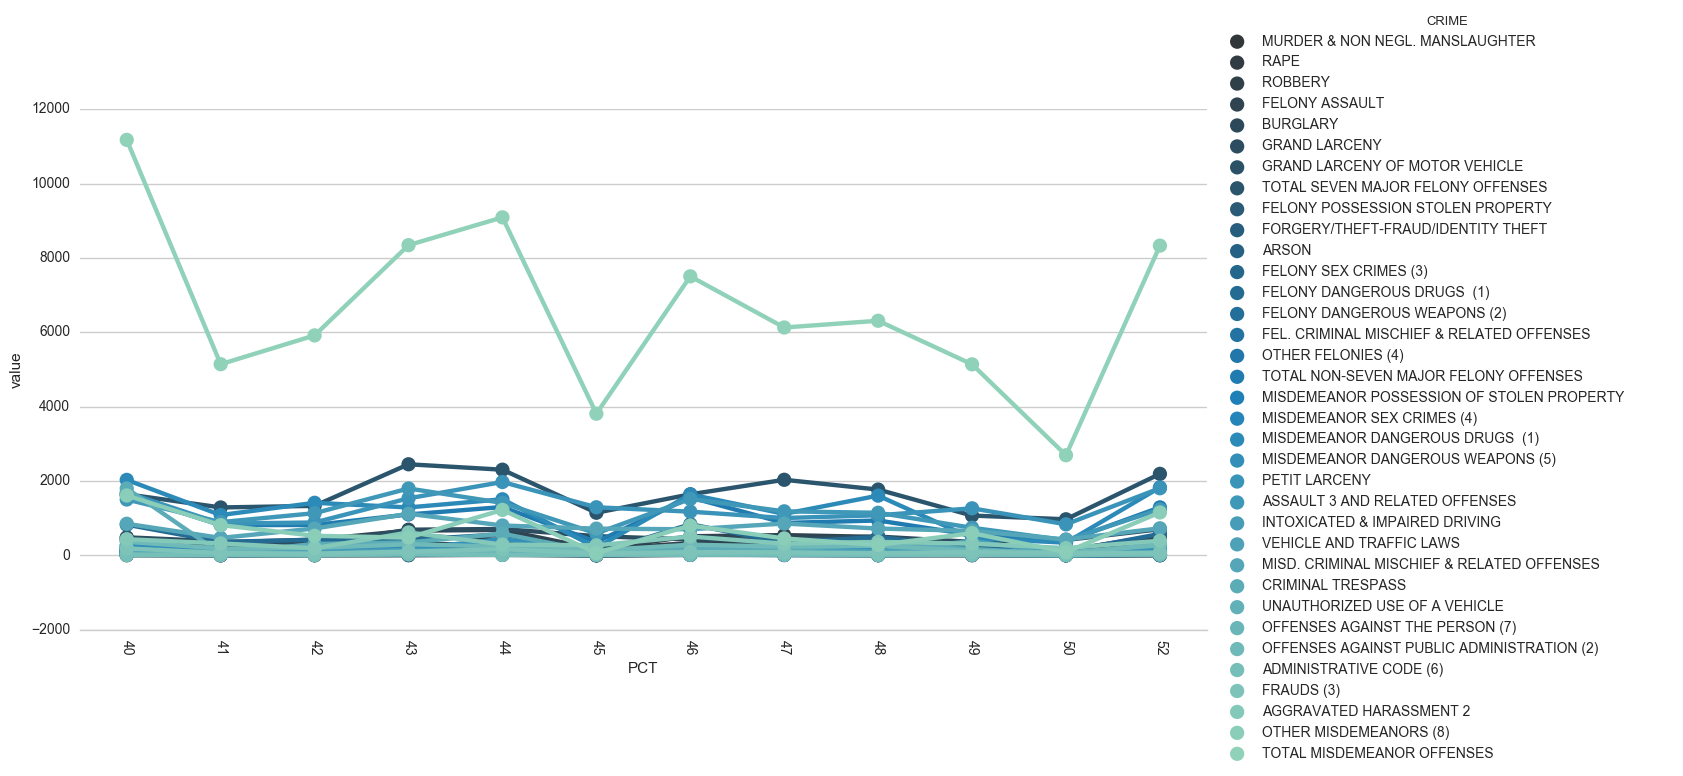

In [103]:
g = sns.factorplot(x="PCT", y="value", hue="CRIME", data=BxC2014,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=2.1)
g.despine(left=True)
g.set_xticklabels(rotation=270)

### Overtime by b

In [104]:
BKCtemp = datap[datap['PCT'].isin([60,  61,  62,  63,  66,
        67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,  81,
        83,  84,  88,  90,  94])]

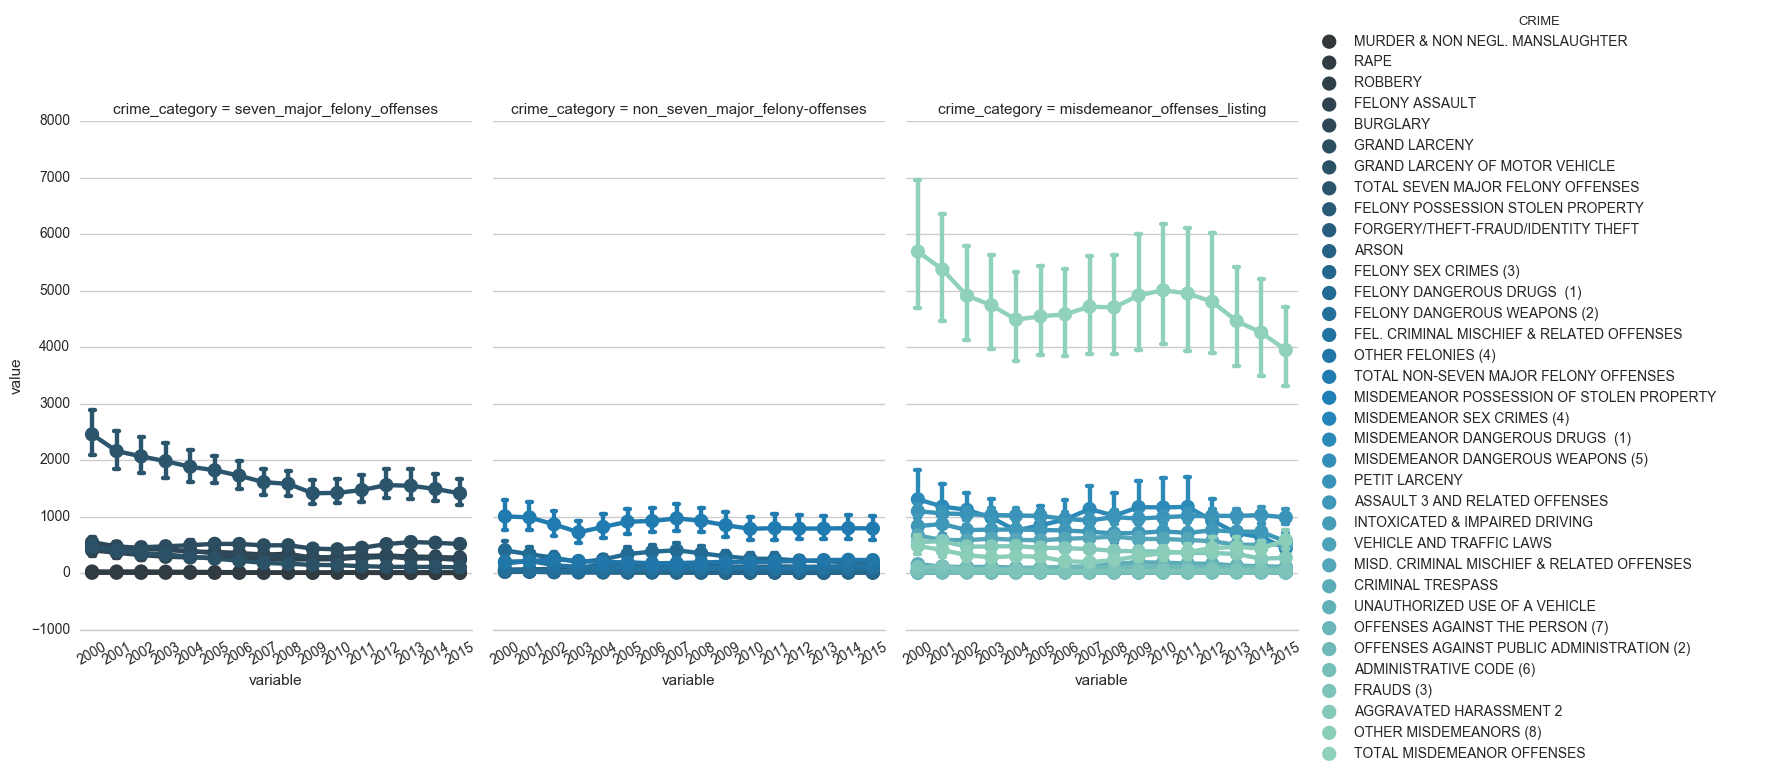

In [106]:
g = sns.factorplot(x="variable", y="value", hue="CRIME", col="crime_category", data=BKCtemp,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)
g.set_xticklabels(rotation=30)

In [107]:
BKtemp = datap[datap['PCT'].isin([60,  61,  62,  63,  66,
        67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,  81,
        83,  84,  88,  90,  94])]
QCtemp = datap[datap['PCT'].isin([100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115])]
MCtemp = datap[datap['PCT'].isin([1,   5,   6,   7,   9,  10,  13,  14,  17,  18,  19,  20,  22,
        23,  24,  25,  26,  28,  30,  32,  33,  34])]
SCtemp = datap[datap['PCT'].isin([120, 121, 122, 123])]

### Brooklyn

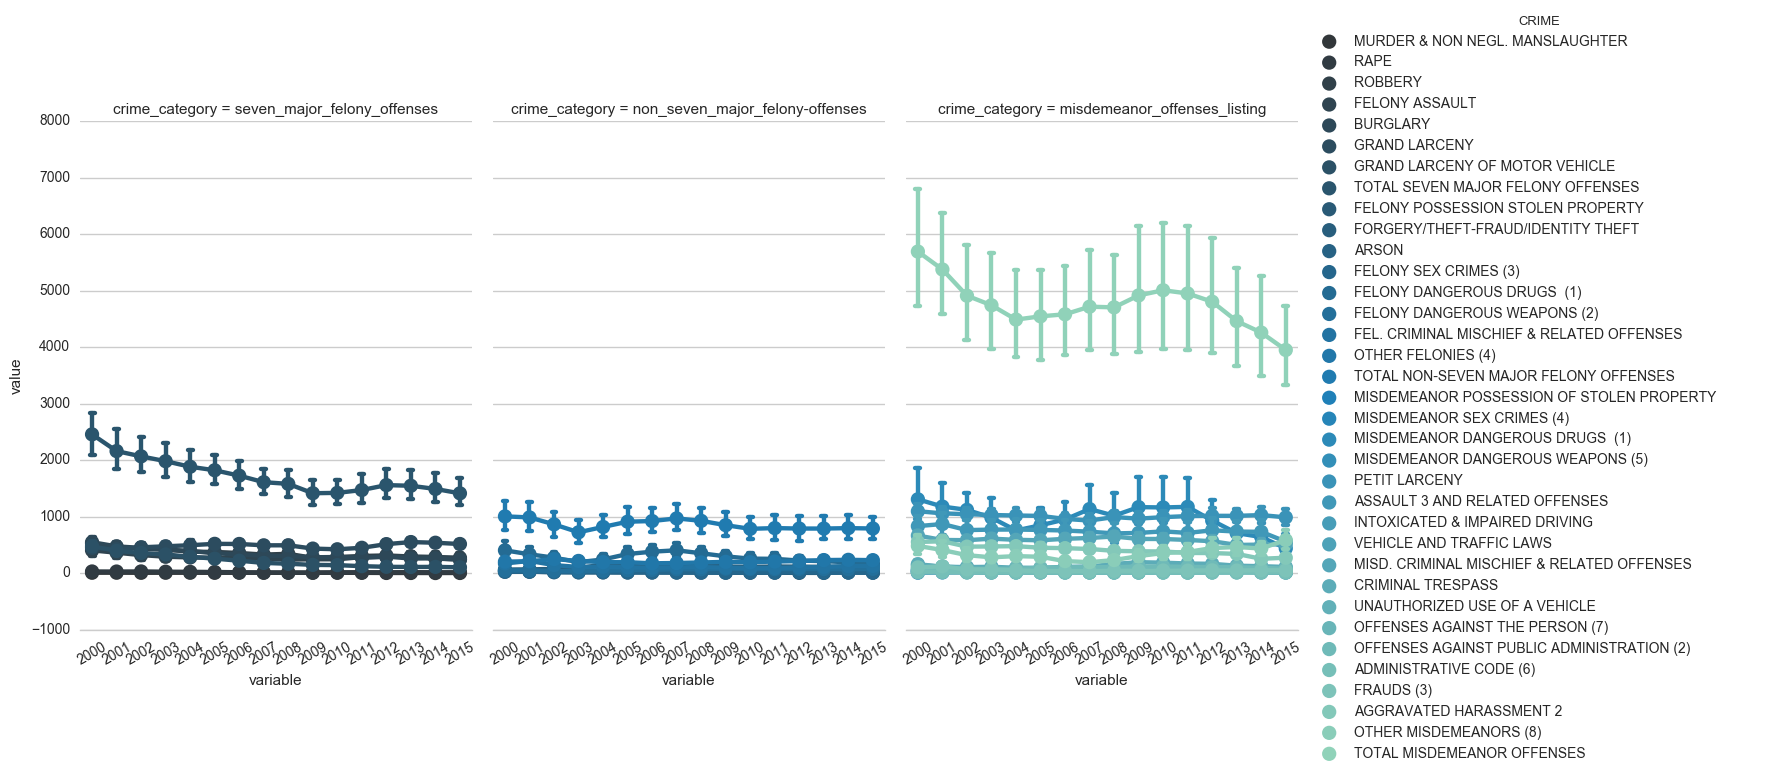

In [108]:
g = sns.factorplot(x="variable", y="value", hue="CRIME", col="crime_category", data=BKtemp,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)
g.set_xticklabels(rotation=30)

### Queens

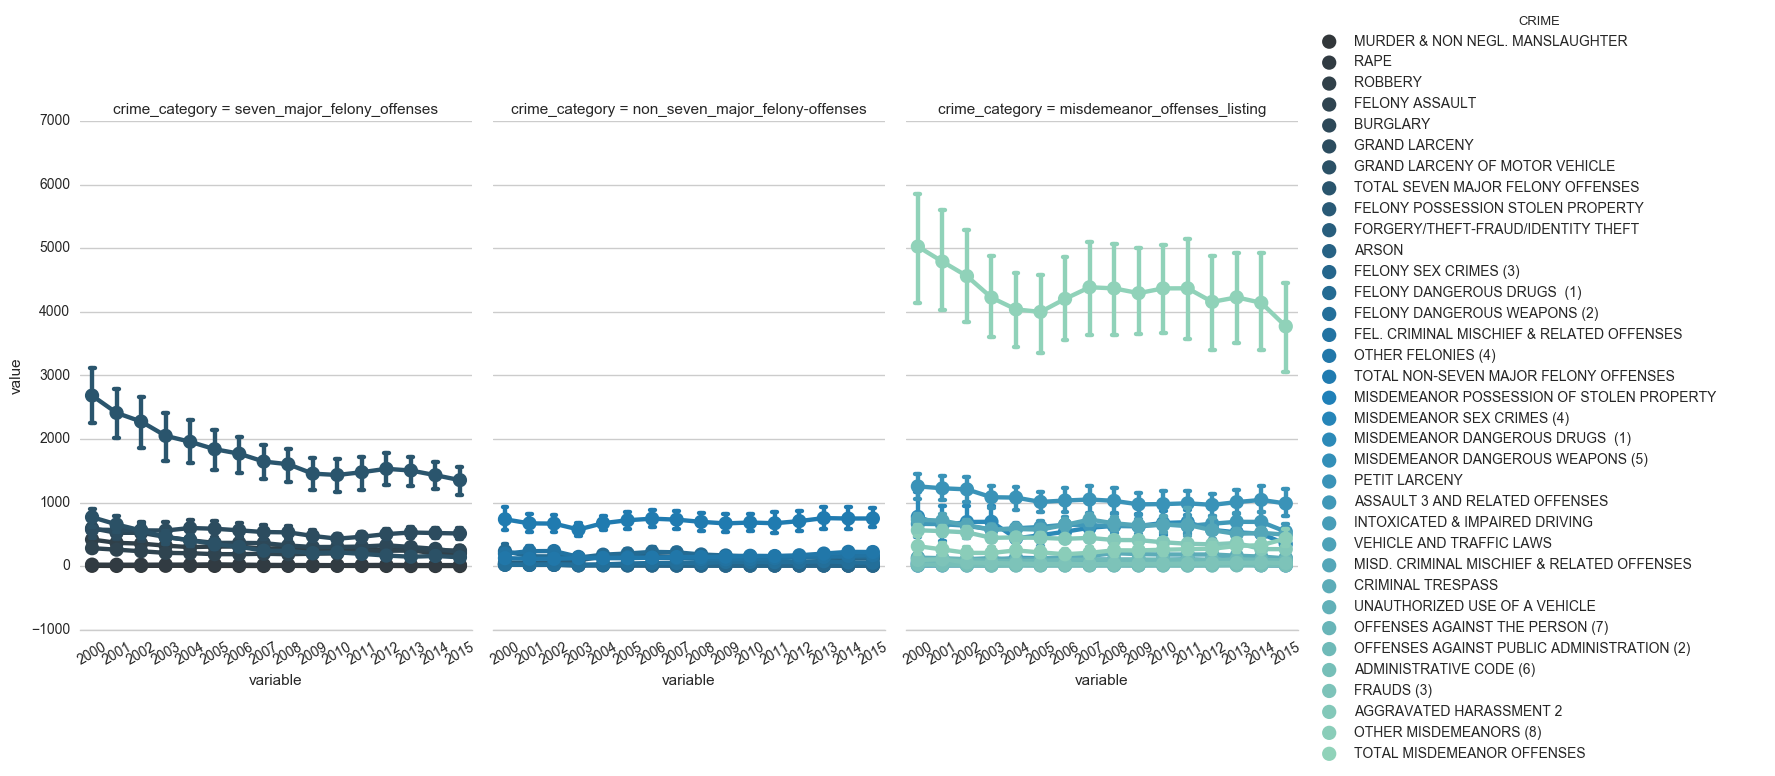

In [109]:
g = sns.factorplot(x="variable", y="value", hue="CRIME", col="crime_category", data=QCtemp,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)
g.set_xticklabels(rotation=30)

### Manhattan

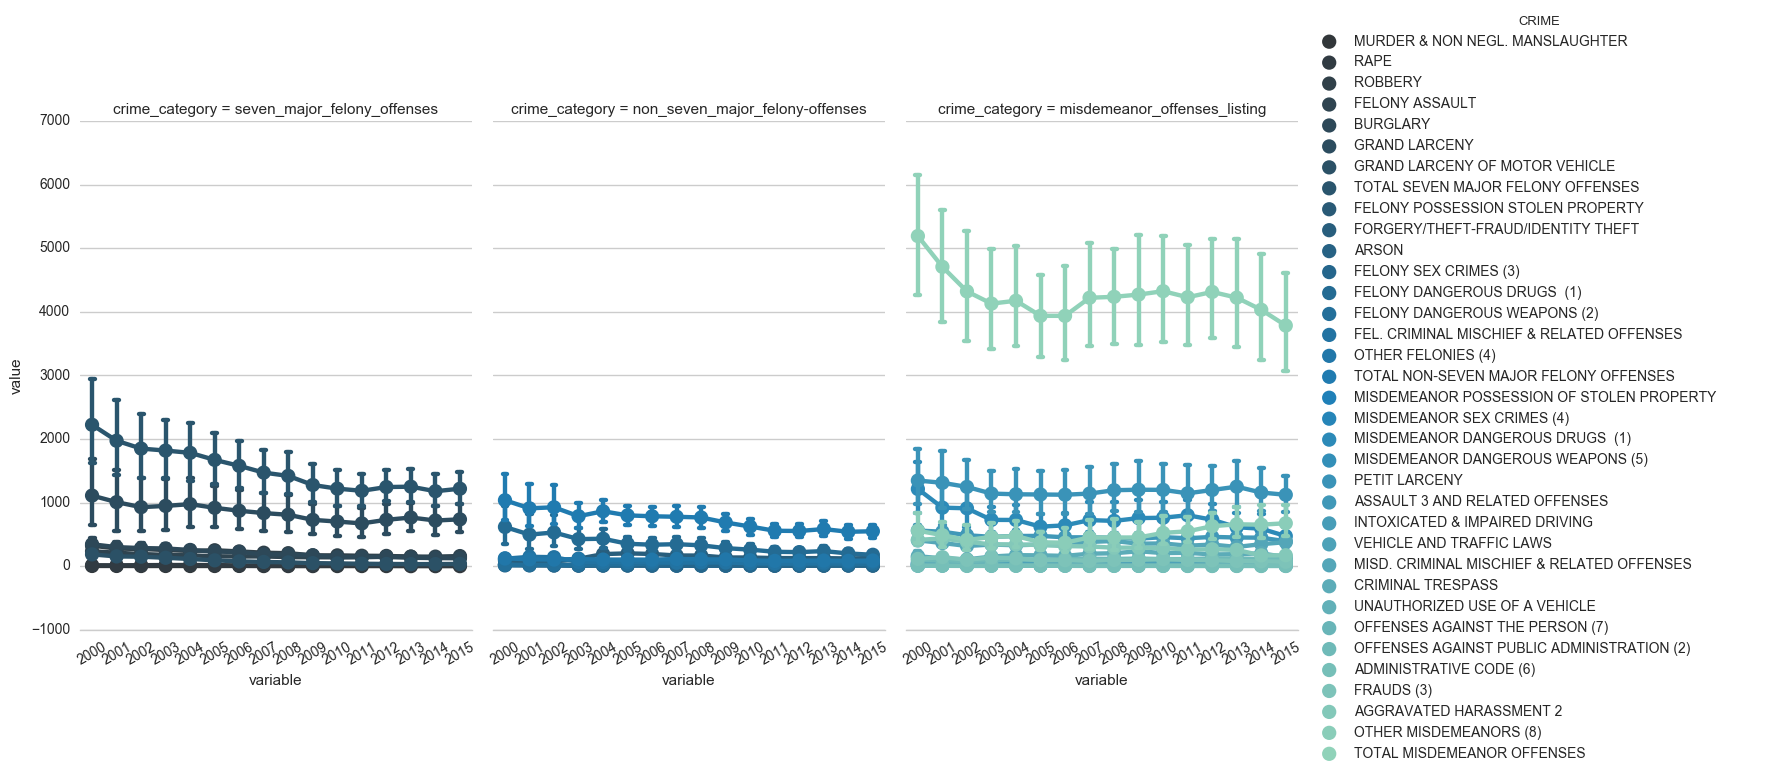

In [110]:
g = sns.factorplot(x="variable", y="value", hue="CRIME", col="crime_category", data=MCtemp,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)
g.set_xticklabels(rotation=30)

### S

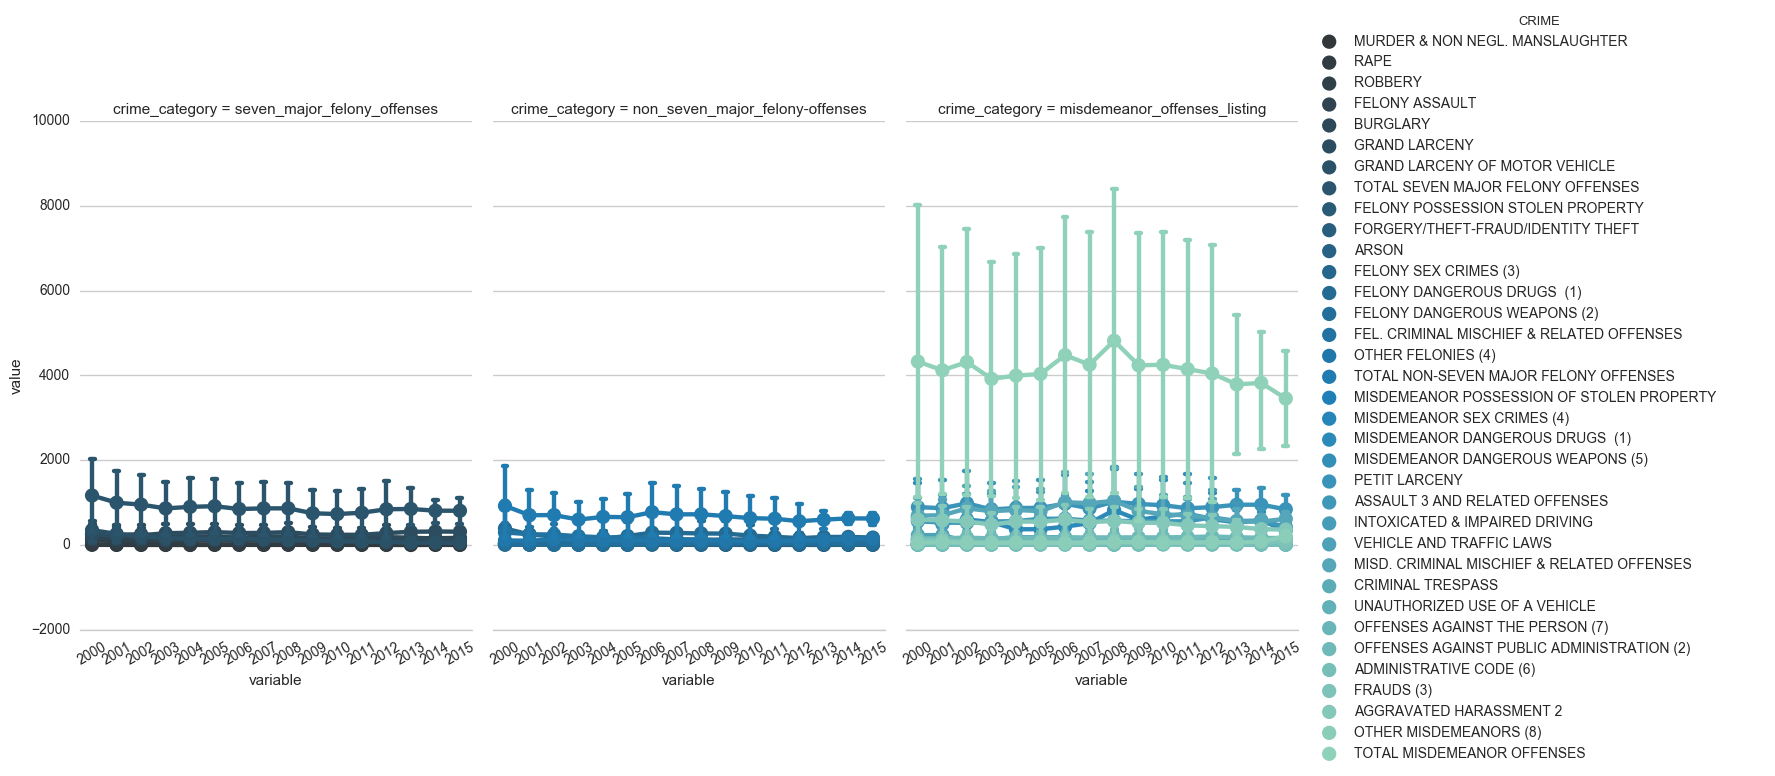

In [111]:
g = sns.factorplot(x="variable", y="value", hue="CRIME", col="crime_category", data=SCtemp,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)
g.set_xticklabels(rotation=30)

### Which crimes co-occur?

In [112]:
datap.head()

,crime_category,CRIME,PCT,variable,value
0,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,1,2000,3.0
1,seven_major_felony_offenses,RAPE,1,2000,12.0
2,seven_major_felony_offenses,ROBBERY,1,2000,252.0
3,seven_major_felony_offenses,FELONY ASSAULT,1,2000,139.0
4,seven_major_felony_offenses,BURGLARY,1,2000,475.0


In [114]:
len(BxC2014['CRIME'])

420

#### reshape data

In [115]:
data_cy = pd.melt(nypd,id_vars=['CRIME', 'PCT'], value_vars=['2000','2001','2002','2003','2004','2005',
                                                                     '2006','2007','2008',
                                                                     '2009','2010','2011',
                                                                    '2012','2013','2014','2015'])

In [125]:
data_cy = nypd.drop('crime_category', axis=1)
data_cy = data_cy.drop('PCT', axis=1)
#df.drop('reports', axis=1)

In [126]:
data_cy.head()

,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,MURDER & NON NEGL. MANSLAUGHTER ...,3.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
1,RAPE,12.0,5.0,10.0,11.0,11.0,5.0,4.0,7.0,12.0,4.0,6.0,13.0,10.0,12.0,8.0,7.0
2,ROBBERY,252.0,188.0,210.0,164.0,154.0,172.0,119.0,128.0,108.0,106.0,96.0,102.0,81.0,68.0,50.0,79.0
3,FELONY ASSAULT,139.0,164.0,147.0,134.0,129.0,121.0,94.0,90.0,83.0,83.0,68.0,94.0,110.0,87.0,76.0,86.0
4,BURGLARY,475.0,437.0,297.0,403.0,246.0,293.0,255.0,231.0,189.0,207.0,170.0,155.0,188.0,171.0,145.0,138.0


## Which crimes happen at the same rate by year?

In [127]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
% matplotlib inline
import numpy as np
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [ ]:
Y = df2.ix[:,21].values
X = df2.ix[:,1:21].values

In [133]:
Y= data_cy.ix[:,0].values

X = data_cy.ix[:,1:17]

In [134]:
X

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,3.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
1,12.0,5.0,10.0,11.0,11.0,5.0,4.0,7.0,12.0,4.0,6.0,13.0,10.0,12.0,8.0,7.0
2,252.0,188.0,210.0,164.0,154.0,172.0,119.0,128.0,108.0,106.0,96.0,102.0,81.0,68.0,50.0,79.0
3,139.0,164.0,147.0,134.0,129.0,121.0,94.0,90.0,83.0,83.0,68.0,94.0,110.0,87.0,76.0,86.0
4,475.0,437.0,297.0,403.0,246.0,293.0,255.0,231.0,189.0,207.0,170.0,155.0,188.0,171.0,145.0,138.0
5,2358.0,2117.0,1896.0,1803.0,1708.0,1624.0,1462.0,1395.0,1258.0,1122.0,1065.0,979.0,985.0,1051.0,896.0,1114.0
6,199.0,157.0,153.0,132.0,133.0,90.0,78.0,63.0,57.0,54.0,38.0,59.0,41.0,27.0,33.0,21.0
7,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,1708.0,1578.0,1445.0,1402.0,1416.0,1416.0,1208.0,1446.0
8,13.0,14.0,8.0,7.0,4.0,6.0,3.0,13.0,17.0,13.0,17.0,15.0,12.0,10.0,31.0,13.0
9,119.0,97.0,89.0,141.0,250.0,152.0,136.0,161.0,213.0,211.0,197.0,169.0,183.0,111.0,142.0,138.0


In [139]:
dist_out = 1-pairwise_distances(X, metric="cosine")
dist_out

array([[ 1.        ,  0.74496815,  0.85130285, ...,  0.80095359,
         0.75938243,  0.79008773],
       [ 0.74496815,  1.        ,  0.8799047 , ...,  0.9092428 ,
         0.82299086,  0.93679623],
       [ 0.85130285,  0.8799047 ,  1.        , ...,  0.94784221,
         0.85597784,  0.93853571],
       ..., 
       [ 0.80095359,  0.9092428 ,  0.94784221, ...,  1.        ,
         0.86257653,  0.98820047],
       [ 0.75938243,  0.82299086,  0.85597784, ...,  0.86257653,
         1.        ,  0.90339667],
       [ 0.79008773,  0.93679623,  0.93853571, ...,  0.98820047,
         0.90339667,  1.        ]])

In [148]:
import plotly.plotly as py
import plotly.graph_objs as go

In [140]:
dist_out

array([[ 1.        ,  0.74496815,  0.85130285, ...,  0.80095359,
         0.75938243,  0.79008773],
       [ 0.74496815,  1.        ,  0.8799047 , ...,  0.9092428 ,
         0.82299086,  0.93679623],
       [ 0.85130285,  0.8799047 ,  1.        , ...,  0.94784221,
         0.85597784,  0.93853571],
       ..., 
       [ 0.80095359,  0.9092428 ,  0.94784221, ...,  1.        ,
         0.86257653,  0.98820047],
       [ 0.75938243,  0.82299086,  0.85597784, ...,  0.86257653,
         1.        ,  0.90339667],
       [ 0.79008773,  0.93679623,  0.93853571, ...,  0.98820047,
         0.90339667,  1.        ]])

In [149]:
data = [
    go.Heatmap(
        z=dist_out
    )
]

In [154]:
####py.iplot(data, filename = 'Crimes_year')

In [ ]:
dist_out.shape()

In [ ]:
sns.heatmap(dist_out)

KeyboardInterrupt: 

In [ ]:
import nummpy as np

In [147]:
dist_out_corr = 1-pairwise_distances(X, metric="correlation")
dist_out_corr

array([[ 1.        ,  0.08534247,  0.56815809, ...,  0.34047905,
         0.20338865,  0.37250627],
       [ 0.08534247,  1.        ,  0.07977921, ..., -0.08237677,
        -0.30334587, -0.03048416],
       [ 0.56815809,  0.07977921,  1.        , ...,  0.55668452,
         0.05840685,  0.54054921],
       ..., 
       [ 0.34047905, -0.08237677,  0.55668452, ...,  1.        ,
        -0.31648221,  0.93255011],
       [ 0.20338865, -0.30334587,  0.05840685, ..., -0.31648221,
         1.        , -0.27645815],
       [ 0.37250627, -0.03048416,  0.54054921, ...,  0.93255011,
        -0.27645815,  1.        ]])

In [ ]:
### cosine, just signifies same orientation
#correlation

In [120]:
data.head()

,crime_category,CRIME,variable,value
0,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,2000,3.0
1,seven_major_felony_offenses,RAPE,2000,12.0
2,seven_major_felony_offenses,ROBBERY,2000,252.0
3,seven_major_felony_offenses,FELONY ASSAULT,2000,139.0
4,seven_major_felony_offenses,BURGLARY,2000,475.0


### PCTs
* Bronx PCTs = 40 - 52
* Queens PCTs = 100 - 115
* http://www.nyc.gov/html/nypd/html/home/precincts.shtml

In [ ]:
#### Map PCT to location

In [13]:
#### load PCT data
pct_loc = pd.read_csv("../data/nypp.csv")

In [15]:
pct_loc.head()

,Shape_Area,Shape_Leng,the_geom,Precinct
0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...,1
1,1.808880e+07,18676.124259,MULTIPOLYGON (((-73.98863862848766 40.72293372...,5
2,2.213193e+07,27182.610113,MULTIPOLYGON (((-73.99968392160721 40.73855224...,6
3,4.533179e+07,29978.094261,MULTIPOLYGON (((-73.92854313809303 40.66457328...,71
4,1.046502e+08,89173.452605,MULTIPOLYGON (((-73.99840899113158 40.67186872...,72


In [19]:
datap.to_csv("../data/nypd_reshaped.csv")

In [20]:
pct_loc.Precinct.unique()

array([  1,   5,   6,  71,  72,   7,   9,  26,  10,  28,  13,  14,  17,
        30,  18,  19,  20,  22,  23,  24,  25,  79,  32,  73,  33,  34,
        75,  40,  41,  42,  43,  48,  44,  45,  46,  47,  49,  50,  67,
        52,  60,  61,  62,  63,  66,  68,  69,  70,  76,  77,  78,  81,
        83,  84,  88,  90,  94, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 120, 121, 122, 123])

In [23]:
pct_loc.to_csv("../data/datapct_loc.csv")

In [24]:
pct_loc

,Shape_Area,Shape_Leng,the_geom,Precinct
0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...,1
1,1.808880e+07,18676.124259,MULTIPOLYGON (((-73.98863862848766 40.72293372...,5
2,2.213193e+07,27182.610113,MULTIPOLYGON (((-73.99968392160721 40.73855224...,6
3,4.533179e+07,29978.094261,MULTIPOLYGON (((-73.92854313809303 40.66457328...,71
4,1.046502e+08,89173.452605,MULTIPOLYGON (((-73.99840899113158 40.67186872...,72
5,1.836339e+07,17301.475777,MULTIPOLYGON (((-73.97345324119571 40.71896288...,7
6,2.139401e+07,19773.401872,MULTIPOLYGON (((-73.97160900246391 40.72672340...,9
7,2.383601e+07,23938.497091,MULTIPOLYGON (((-73.94607828740384 40.82126321...,26
8,2.722863e+07,40043.175251,MULTIPOLYGON (((-74.001386036986 40.7628500950...,10
9,1.528954e+07,17098.987088,MULTIPOLYGON (((-73.94131742369481 40.80771334...,28


In [25]:
pct_loc.tail()

,Shape_Area,Shape_Leng,the_geom,Precinct
72,1.132939e+08,58272.204348,MULTIPOLYGON (((-73.85907893495997 40.76252283...,115
73,2.325348e+08,96174.468481,MULTIPOLYGON (((-74.05356753570328 40.60369646...,120
74,4.757147e+08,138111.676965,MULTIPOLYGON (((-74.15945602438185 40.64144833...,121
75,4.547809e+08,154884.929301,MULTIPOLYGON (((-74.05050806403284 40.56642203...,122
76,4.607882e+08,120870.716714,MULTIPOLYGON (((-74.1698265639346 40.561078003...,123


In [27]:
labelswgeo= pct_loc['Precinct']

In [29]:
labelswgeo.to_csv("../data/geo_known.csv")

### not all PCTs are included 

In [ ]:
#result = pd.concat([df1, df4], axis=1)
#pct_loc
#datap

In [30]:
pct_loc.rename(columns={'Precinct': 'PCT'}, inplace=True)

In [31]:
pct_loc.head()

,Shape_Area,Shape_Leng,the_geom,PCT
0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...,1
1,1.808880e+07,18676.124259,MULTIPOLYGON (((-73.98863862848766 40.72293372...,5
2,2.213193e+07,27182.610113,MULTIPOLYGON (((-73.99968392160721 40.73855224...,6
3,4.533179e+07,29978.094261,MULTIPOLYGON (((-73.92854313809303 40.66457328...,71
4,1.046502e+08,89173.452605,MULTIPOLYGON (((-73.99840899113158 40.67186872...,72


In [32]:
joined = pd.concat([datap],[pct_loc], axis=1)

TypeError: concat() got multiple values for keyword argument 'axis'

In [33]:
pd.merge(datap, pct_loc, on='PCT', how='outer')

,crime_category,CRIME,PCT,variable,value,Shape_Area,Shape_Leng,the_geom
0,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,1,2000,3.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
1,seven_major_felony_offenses,RAPE,1,2000,12.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
2,seven_major_felony_offenses,ROBBERY,1,2000,252.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
3,seven_major_felony_offenses,FELONY ASSAULT,1,2000,139.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
4,seven_major_felony_offenses,BURGLARY,1,2000,475.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
5,seven_major_felony_offenses,GRAND LARCENY,1,2000,2358.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
6,seven_major_felony_offenses,GRAND LARCENY OF MOTOR VEHICLE ...,1,2000,199.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
7,seven_major_felony_offenses,TOTAL SEVEN MAJOR FELONY OFFENSES,1,2000,3438.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
8,non_seven_major_felony-offenses,FELONY POSSESSION STOLEN PROPERTY,1,2000,13.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
9,non_seven_major_felony-offenses,FORGERY/THEFT-FRAUD/IDENTITY THEFT ...,1,2000,119.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...


In [34]:
NYPD_reshaped_geo = pd.merge(datap, pct_loc, on='PCT', how='outer')

In [35]:
## give shorter name
NRG = NYPD_reshaped_geo

#### Working with geopandas

In [36]:
from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


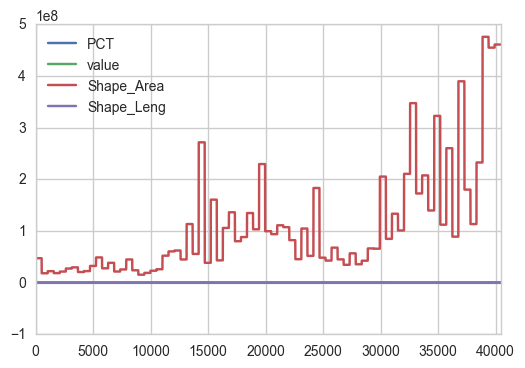

In [37]:
NRG.plot()

In [38]:
NRG.head()

,crime_category,CRIME,PCT,variable,value,Shape_Area,Shape_Leng,the_geom
0,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,1,2000,3.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
1,seven_major_felony_offenses,RAPE,1,2000,12.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
2,seven_major_felony_offenses,ROBBERY,1,2000,252.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
3,seven_major_felony_offenses,FELONY ASSAULT,1,2000,139.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
4,seven_major_felony_offenses,BURGLARY,1,2000,475.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...


### load other data

In [40]:
precincts = gpd.GeoDataFrame.from_file("../smart_cities-master/NYC_shapefiles/Police Precincts.geojson")

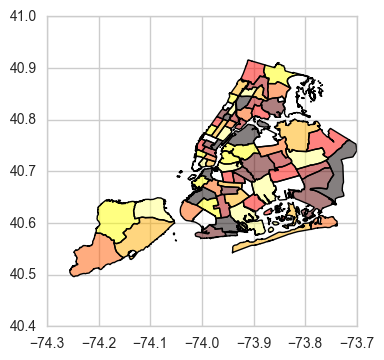

In [43]:
precincts.plot(cmap="hot_r")

In [44]:
NRG.head()

,crime_category,CRIME,PCT,variable,value,Shape_Area,Shape_Leng,the_geom
0,seven_major_felony_offenses,MURDER & NON NEGL. MANSLAUGHTER ...,1,2000,3.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
1,seven_major_felony_offenses,RAPE,1,2000,12.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
2,seven_major_felony_offenses,ROBBERY,1,2000,252.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
3,seven_major_felony_offenses,FELONY ASSAULT,1,2000,139.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...
4,seven_major_felony_offenses,BURGLARY,1,2000,475.0,4.718213e+07,79979.389271,MULTIPOLYGON (((-74.0438776157395 40.690187676...


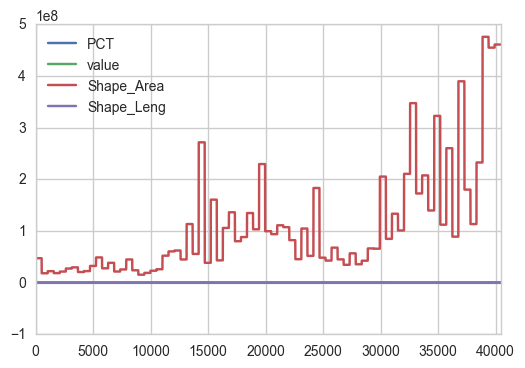

In [48]:
NRG.plot()

In [49]:
NRG.plot?

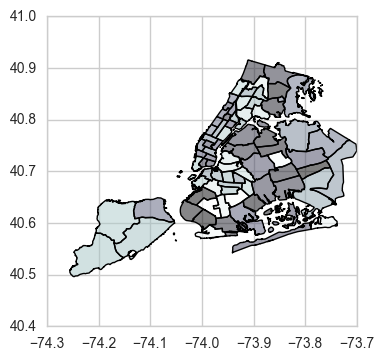

In [46]:
precincts.plot(column="shape_area", cmap="bone")

In [47]:
precincts.head()

,geometry,precinct,shape_area,shape_leng
0,(POLYGON ((-74.0438776157395 40.69018767637665...,1,47182160.4145,79979.409545
1,(POLYGON ((-73.98863862848766 40.7229337202636...,5,18088797.9526,18676.1242594
2,(POLYGON ((-73.99968392160721 40.7385522486597...,6,22131930.5198,27182.610113
3,(POLYGON ((-73.97345324119571 40.7189628870822...,7,18363326.3567,17301.4925491
4,(POLYGON ((-73.97160900246391 40.7267234011698...,9,21394013.3755,19773.4018725


In [50]:
##rename
precincts.rename(columns={'precinct': 'PCT'}, inplace=True)

In [51]:
nrgv2 = pd.merge(precincts, datap, on='PCT', how='outer')

In [52]:
nrgv2.head()

,geometry,PCT,shape_area,shape_leng,crime_category,CRIME,variable,value
0,(POLYGON ((-74.0438776157395 40.69018767637665...,1,47182160.4145,79979.409545,NaN,NaN,NaN,NaN
1,(POLYGON ((-73.98863862848766 40.7229337202636...,5,18088797.9526,18676.1242594,NaN,NaN,NaN,NaN
2,(POLYGON ((-73.99968392160721 40.7385522486597...,6,22131930.5198,27182.610113,NaN,NaN,NaN,NaN
3,(POLYGON ((-73.97345324119571 40.7189628870822...,7,18363326.3567,17301.4925491,NaN,NaN,NaN,NaN
4,(POLYGON ((-73.97160900246391 40.7267234011698...,9,21394013.3755,19773.4018725,NaN,NaN,NaN,NaN


In [54]:
nrgv2.tail()

,geometry,PCT,shape_area,shape_leng,crime_category,CRIME,variable,value
40497,NaN,123,NaN,NaN,misdemeanor_offenses_listing,ADMINISTRATIVE CODE (6),2014,1.0
40498,NaN,123,NaN,NaN,misdemeanor_offenses_listing,FRAUDS (3),2014,64.0
40499,NaN,123,NaN,NaN,misdemeanor_offenses_listing,AGGRAVATED HARASSMENT 2,2014,182.0
40500,NaN,123,NaN,NaN,misdemeanor_offenses_listing,OTHER MISDEMEANORS (8),2014,20.0
40501,NaN,123,NaN,NaN,misdemeanor_offenses_listing,TOTAL MISDEMEANOR OFFENSES,2014,1888.0


In [55]:
nrgv3 = nrgv2.dropna

In [58]:
type(nrgv3)

instancemethod